# Big Mart Sales Analysis

# Business Case: Optimizing Sales Performance and Inventory Management

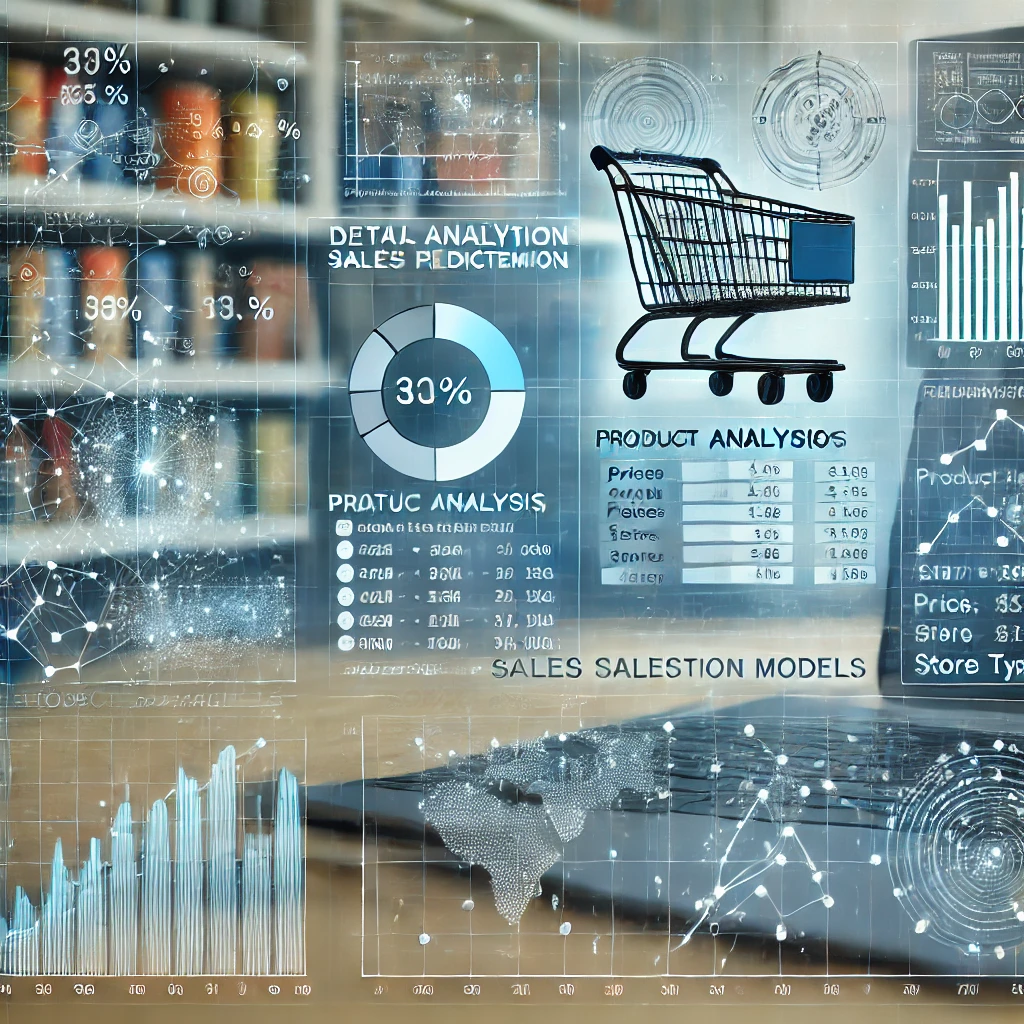

# Domain Analysis:

### Introduction Of Dataset :-


* **Item_Identifier** ---- Unique product ID
* **Item_Weight** ---- Weight of product
* **Item_Fat_Content** ---- Whether the product is low fat or not
* **Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product
* **Item_Type** ---- The category to which the product belongs
* **Item_MRP** ---- Maximum Retail Price (list price) of the product
* **Outlet_Identifier** ---- Unique store ID
* **Outlet_Establishment_Year** ---- The year in which the store was established
* **Outlet_Size** ---- The size of the store in terms of ground area covered
* **Outlet_Location_Type** ---- The type of city in which the store is located
* **Outlet_Type** ---- Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales** ---- sales of the product in t particular store. This is the outcome variable to be predicted.

## IMPORT NECESSARY LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

### LOADING DATA

In [2]:
Big_Mart_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\train.csv")
#Sub_Big_Mart_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\train.csv")
Big_Mart_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### BASIC CHECKS

In [3]:
Big_Mart_df.sample(5).T

3882               2549  \
Item_Identifier                        FDJ15              FDN57   
Item_Weight                            11.35              18.25   
Item_Fat_Content                     Regular            Low Fat   
Item_Visibility                     0.023322           0.054319   
Item_Type                              Dairy        Snack Foods   
Item_MRP                            182.5608           140.9154   
Outlet_Identifier                     OUT046             OUT049   
Outlet_Establishment_Year               1997               1999   
Outlet_Size                            Small             Medium   
Outlet_Location_Type                  Tier 1             Tier 1   
Outlet_Type                Supermarket Type1  Supermarket Type1   
Item_Outlet_Sales                  3307.6944           6381.693   

                                        2272               2853  \
Item_Identifier                        DRC01              FDJ45   
Item_Weight                             5.92              17.75   
Item_Fat_Content                     Regular            Low Fat   
Item_Visibility                     0.019309           0.073525   
Item_Type                        Soft Drinks            Seafood   
Item_MRP                             49.0692            34.8216   
Outlet_Identifier                     OUT017             OUT049   
Outlet_Establishment_Year               2007               1999   
Outlet_Size                              NaN             Medium   
Outlet_Location_Type                  Tier 2             Tier 1   
Outlet_Type                Supermarket Type1  Supermarket Type1   
Item_Outlet_Sales                   1478.076           207.7296   

                                            7982  
Item_Identifier                            FDQ44  
Item_Weight                                 20.5  
Item_Fat_Content                         Low Fat  
Item_Visibility                          0.03611  
Item_Type                  Fruits and Vegetables  
Item_MRP                                120.1756  
Outlet_Identifier                         OUT013  
Outlet_Establishment_Year                   1987  
Outlet_Size                                 High  
Outlet_Location_Type                      Tier 3  
Outlet_Type                    Supermarket Type1  
Item_Outlet_Sales                      2059.9852

In [4]:
#Find shape of the data
Big_Mart_df.shape

(8523, 12)

In [5]:
Big_Mart_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
Big_Mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* **Dataset has 8523 records and 10 features.**


**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type

### STATISTICAL MEASURES OF DATA

In [7]:
#Extracting information about a Continous data
Big_Mart_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

* Item_Visibility: The minimum value is 0, which might indicate missing data encoded as zeros.
* Item_Outlet_Sales: The high standard deviation and range (33.29 to 13,086.96) suggest potential outliers.
* Features like Item_Visibility, Item_MRP, and Item_Weight have varying scales.


**Fix Item_Visibility Zeros**
* Replace zeros with the median of Item_Visibility for similar products.

In [8]:
Big_Mart_df['Item_Visibility'] = Big_Mart_df['Item_Visibility'].replace(0, np.nan)
Big_Mart_df['Item_Visibility'] = Big_Mart_df['Item_Visibility'].fillna(Big_Mart_df['Item_Visibility'].median())


In [9]:
#Extracting information about a Catgorical data
Big_Mart_df.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

* Columns such as Item_Identifier, Item_Fat_Content, Item_Type, and others need proper encoding.
* Item_Fat_Content may have inconsistencies like "Low Fat" vs. "low fat" and "Regular."

## EDA:
### Univariate Analysis :-

In [10]:
import sweetviz as sv
my_report = sv.analyze(Big_Mart_df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


####  DISTRIBUTION OF MEAN OF DATA :-

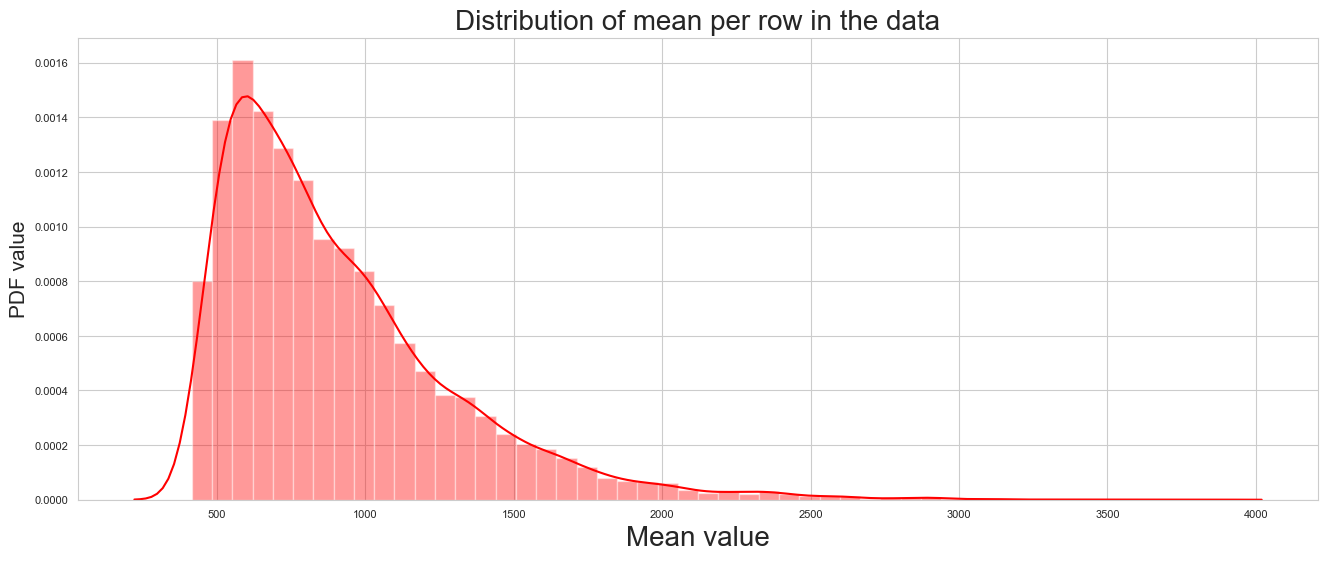

In [11]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = Big_Mart_df.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(Big_Mart_df[features].mean(axis=1),color='RED', kde=True)
plt.show()

#### DISTRIBUTION OF STANDARD DEVIATION OF DATA :-:-

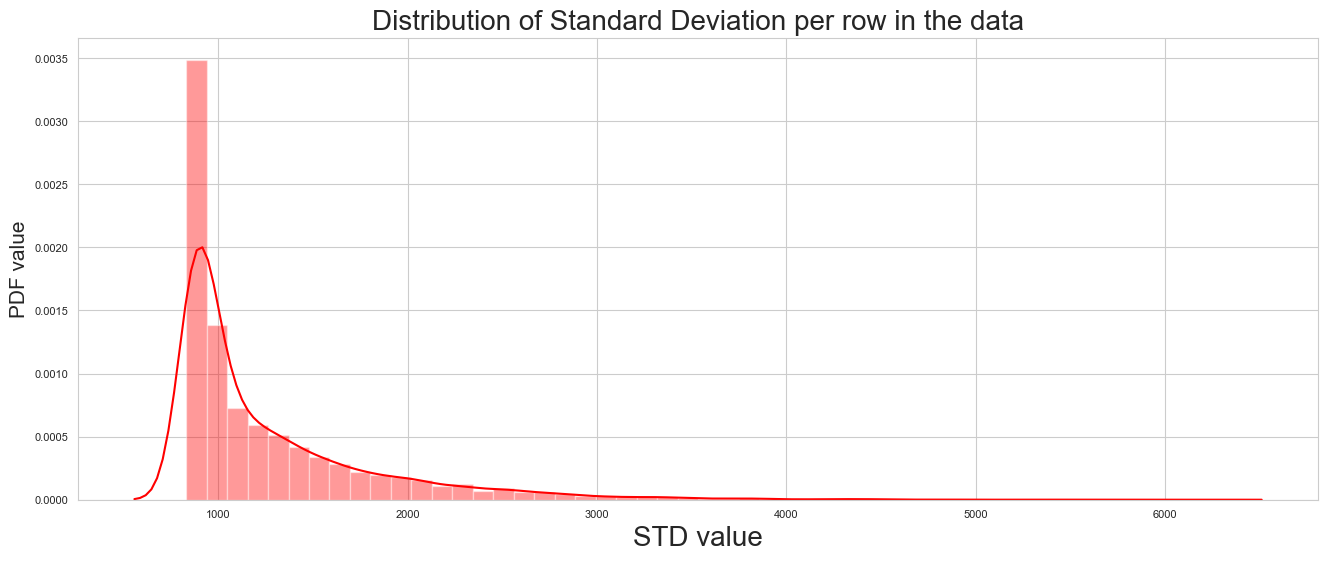

In [12]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = Big_Mart_df.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(Big_Mart_df[features].std(axis=1),color='RED', kde=True)
plt.show()

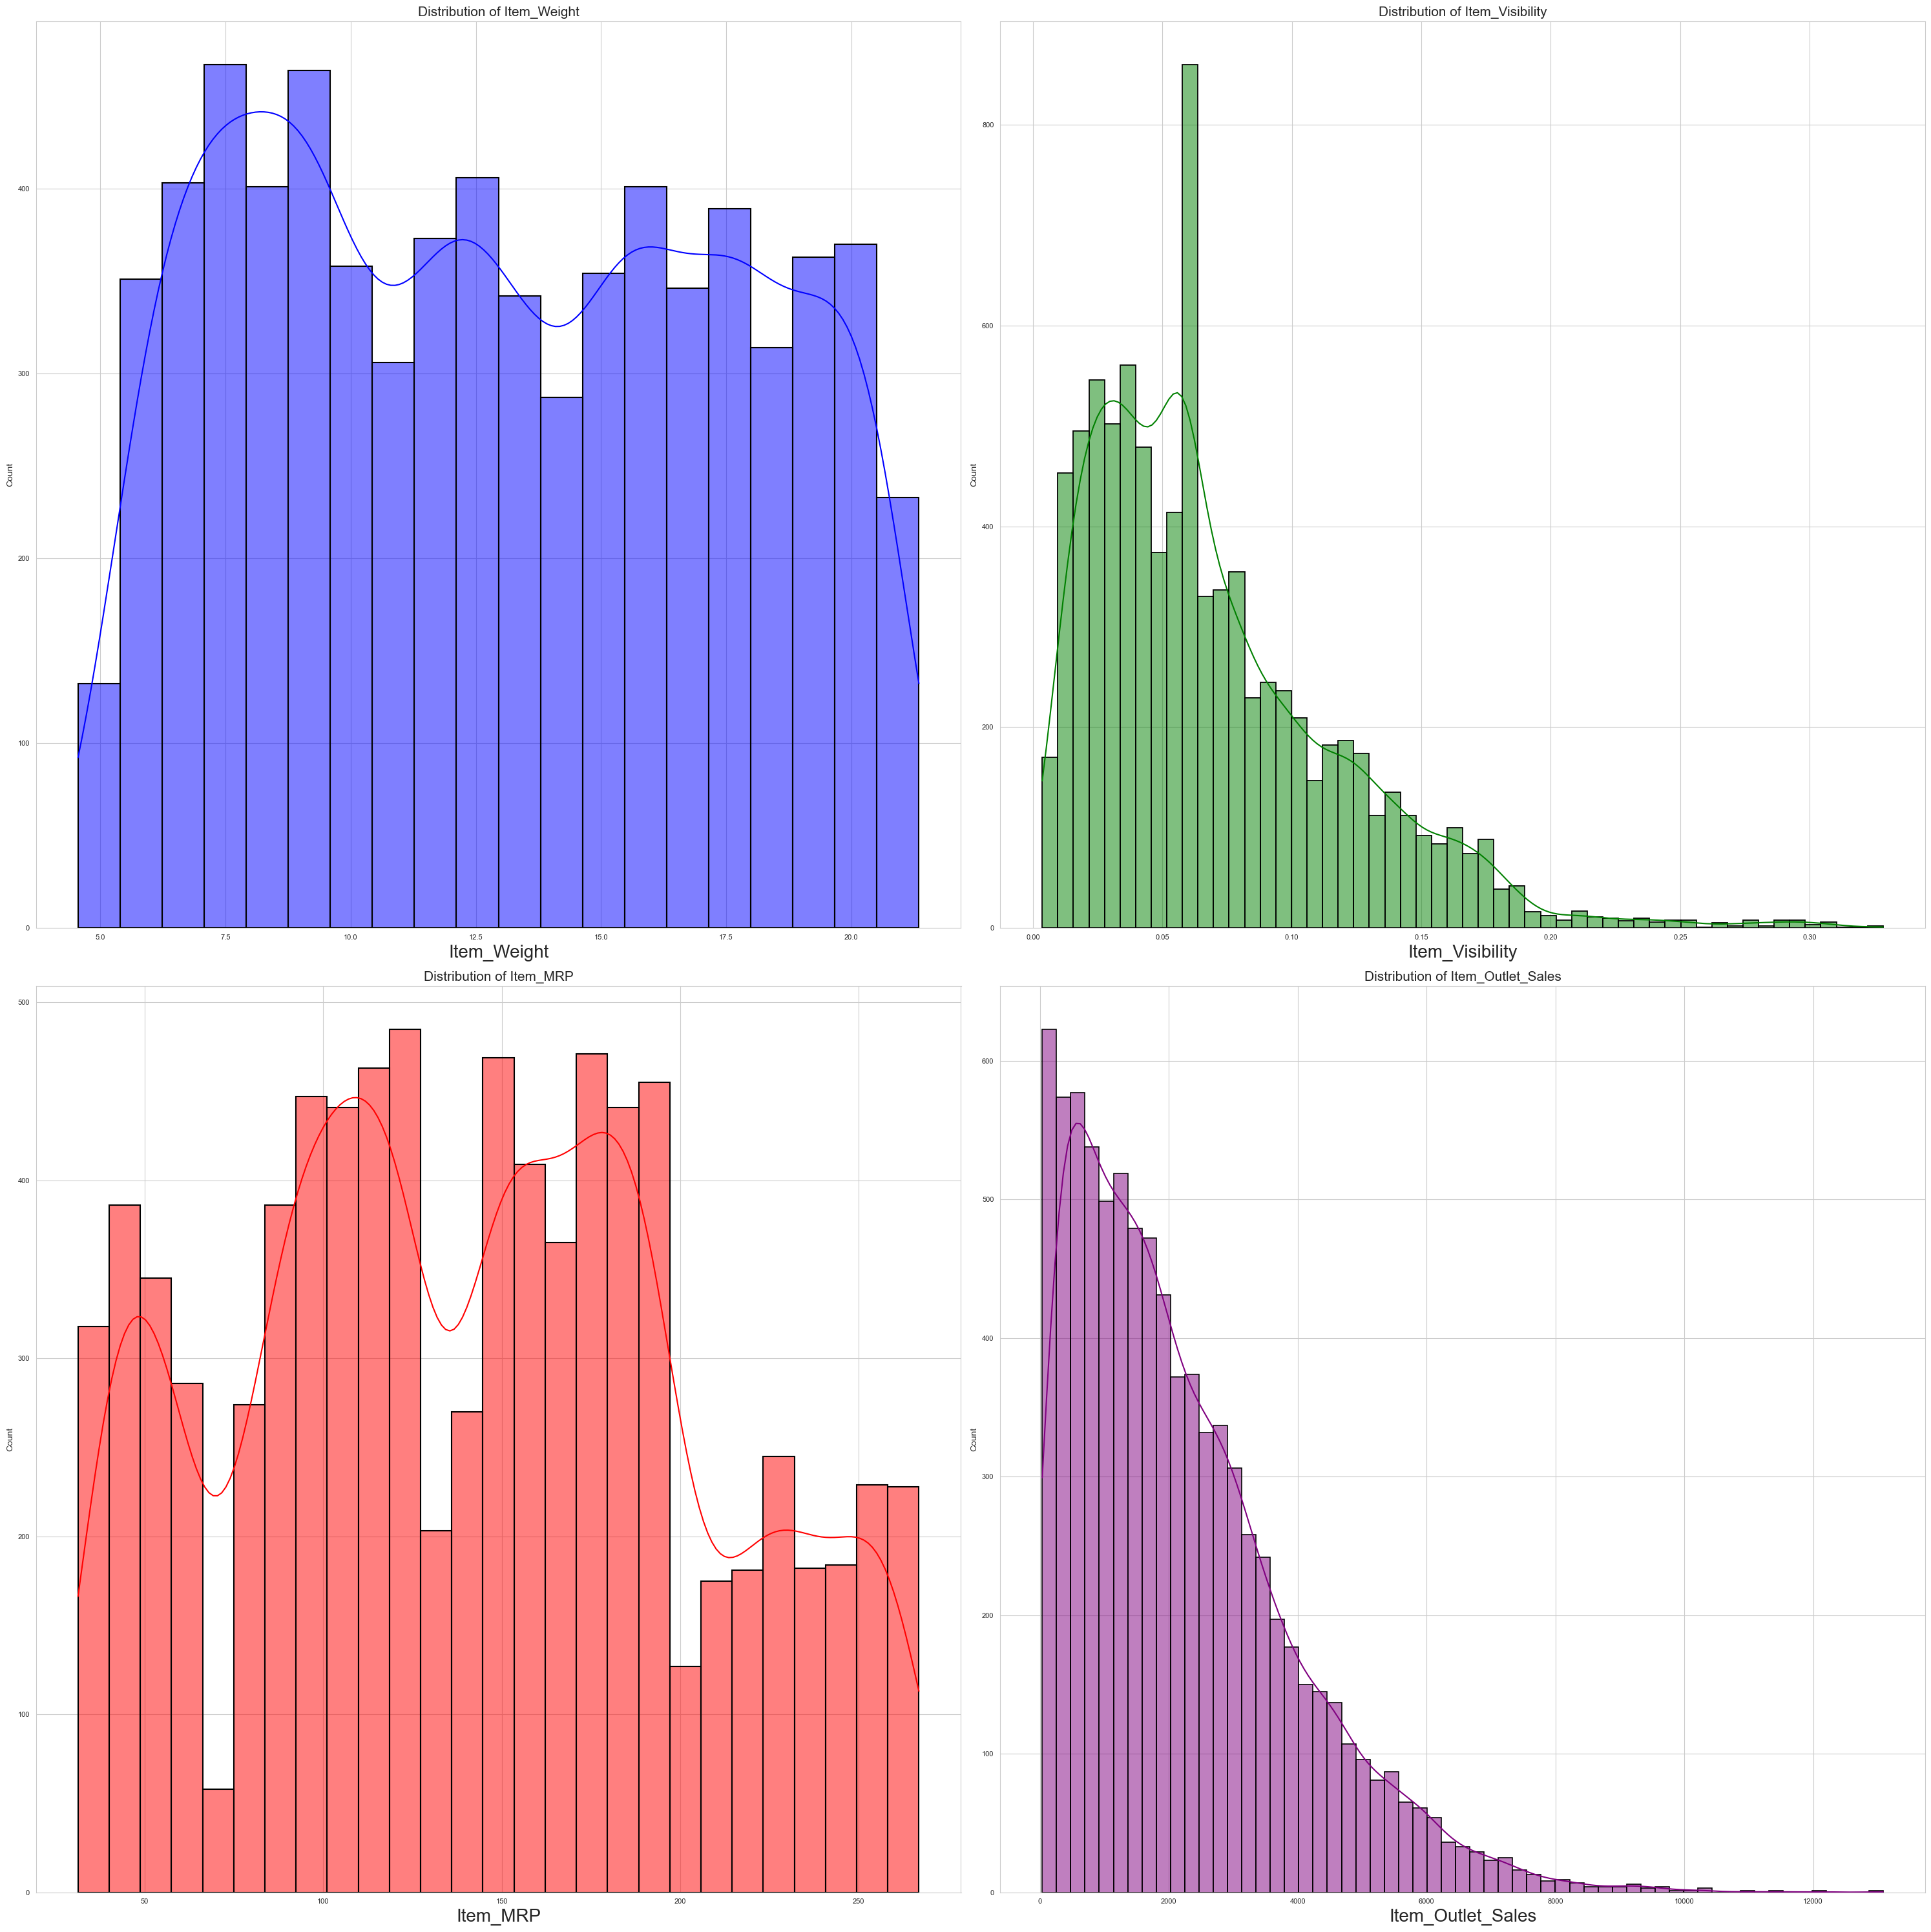

In [13]:
# Define the palette as a dictionary
palette = {
    'Item_Weight': 'blue',
    'Item_Visibility': 'green',
    'Item_MRP': 'red',
    'Item_Outlet_Sales': 'purple'
}
def kdeplot(df,continuous):
    plt.figure(figsize=(30,30)) # defining canvas size
    plotno = 1 # counter
    for column in continuous:
        if plotno<=8:
            plt.subplot(2,2,plotno) # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.histplot(x = column, data=df, color=palette.get(column,'gray'), kde=True, lw=1.5, edgecolor='black')
            plt.xlabel(column,fontsize = 20)
            plt.title(f'Distribution of {column}', fontsize=15)
        plotno +=1
    plt.tight_layout()
    plt.show()
    
continuous = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
kdeplot(Big_Mart_df,continuous)

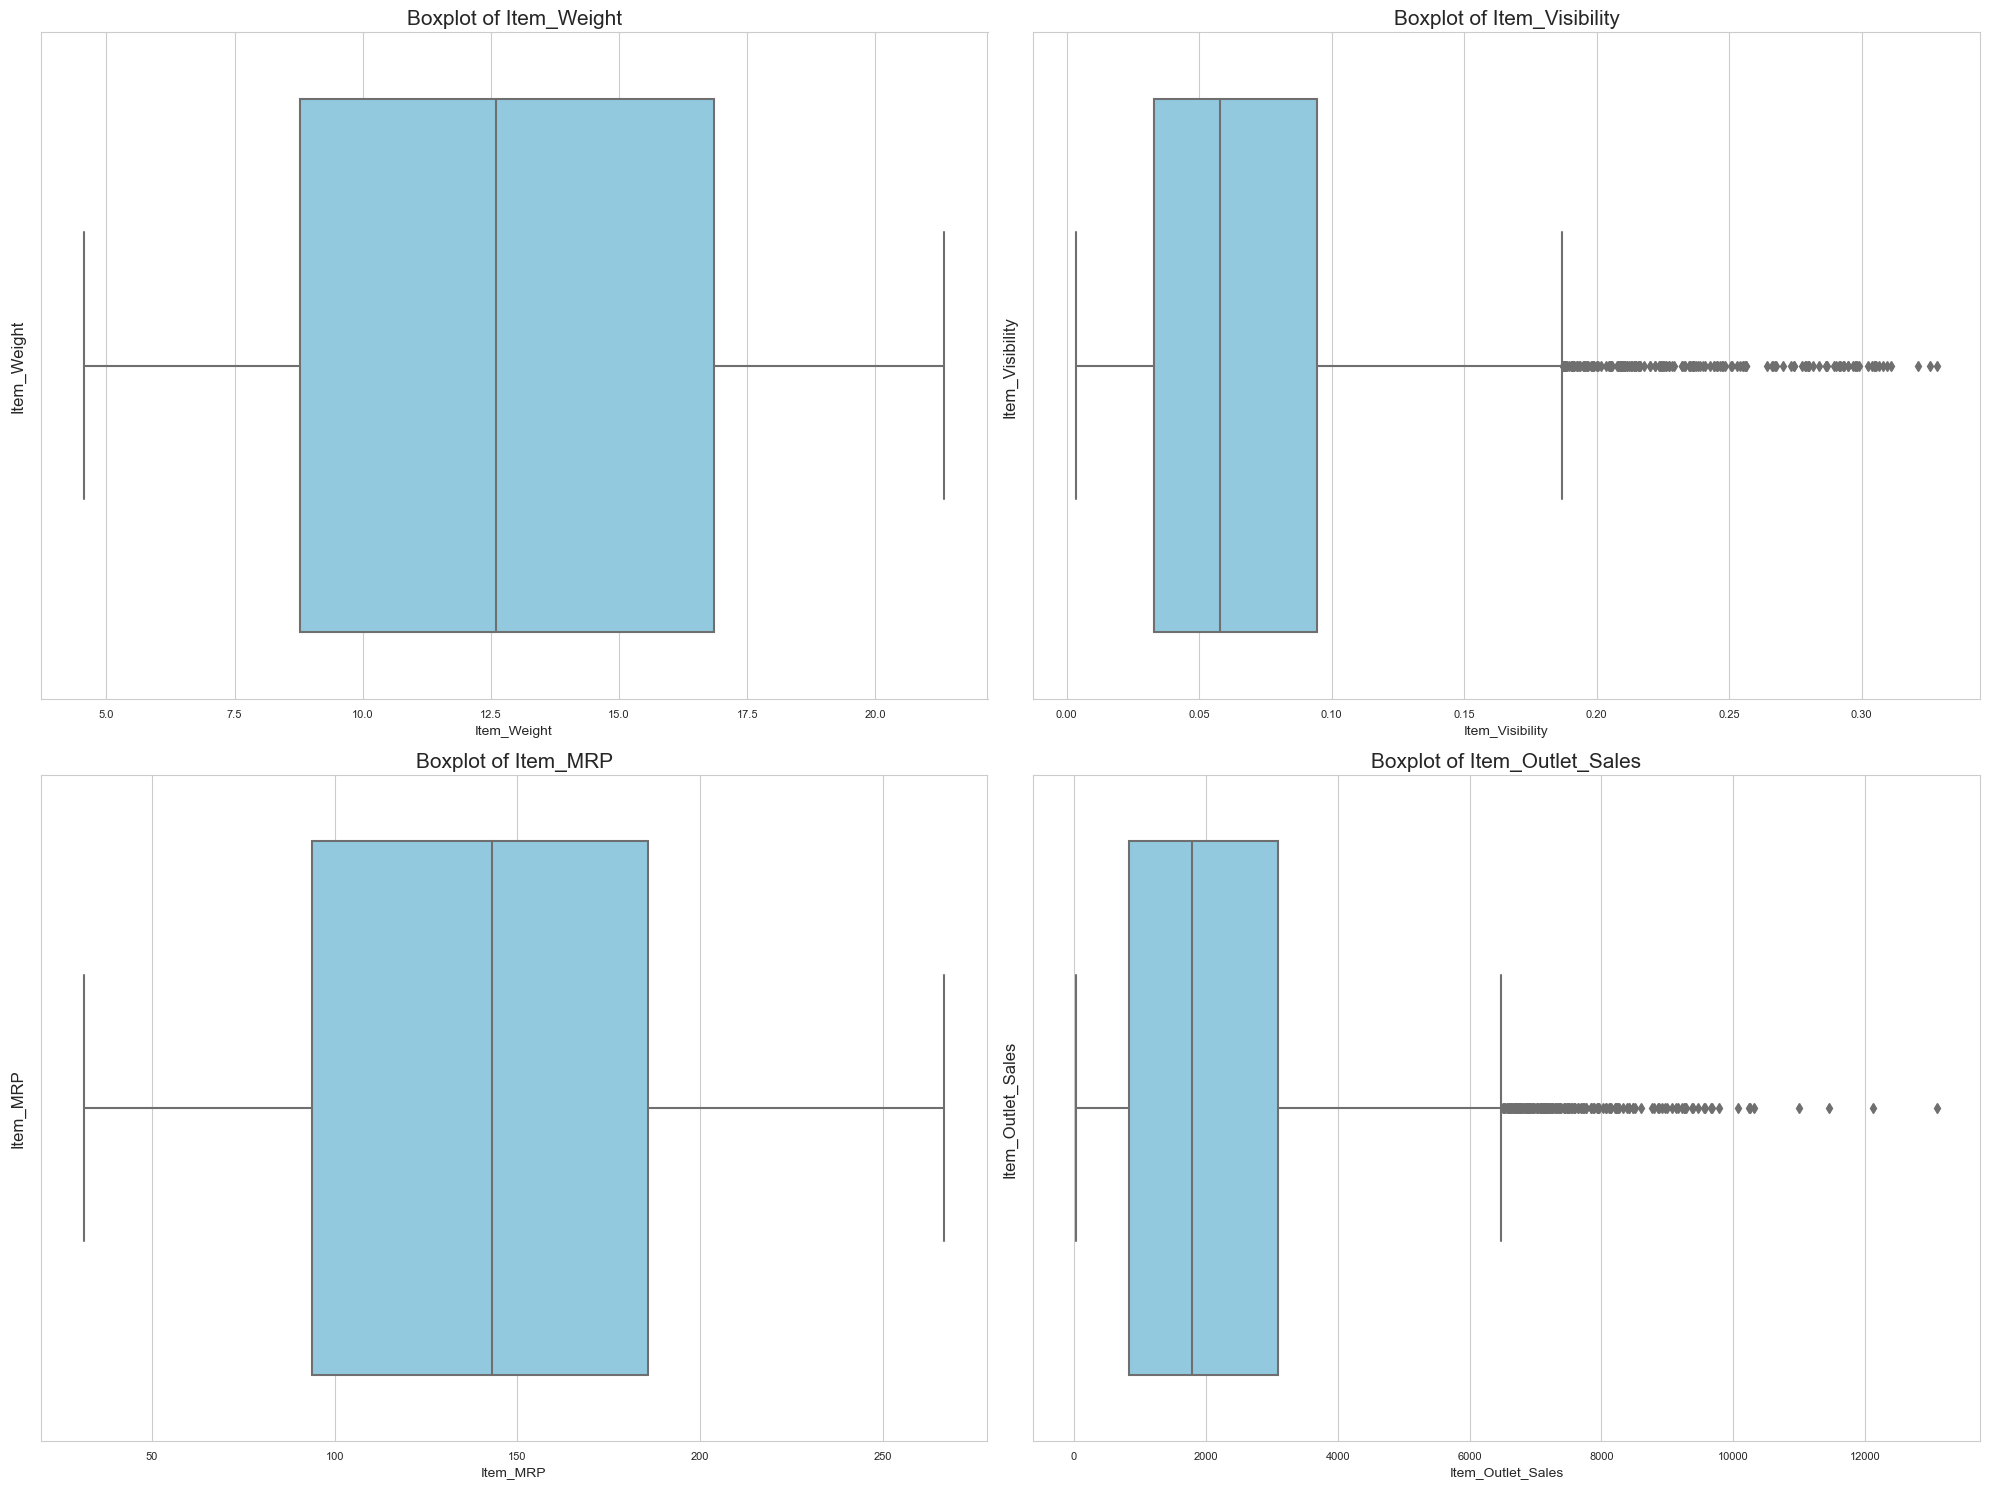

In [14]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Call the function
boxplot(Big_Mart_df, continuous)


In [15]:
def pie_plot(columns,df):
    num_columns = 2
    num_rows = 3

    fig,axes = plt.subplots(num_rows,num_columns,figsize=(14,12))
    axes = axes.flatten()
    for i,column in enumerate(columns):
        counts = df[column].value_counts()
        palette = sns.color_palette('viridis',df[column].nunique())

        axes[i].pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
        axes[i].set_title(f'{column} Distribution',fontsize=20,fontweight='bold')

    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [16]:
df_cp =  Big_Mart_df.copy()
item_counts = df_cp['Item_Type'].value_counts()

def categorize_item_type(item_type):
    if item_counts[item_type] < 445:
        return 'Others'
    return item_type

df_cp['Item_Type'] = df_cp['Item_Type'].apply(categorize_item_type)
df_cp['Item_Type'].value_counts()

Others                   1381
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Name: Item_Type, dtype: int64

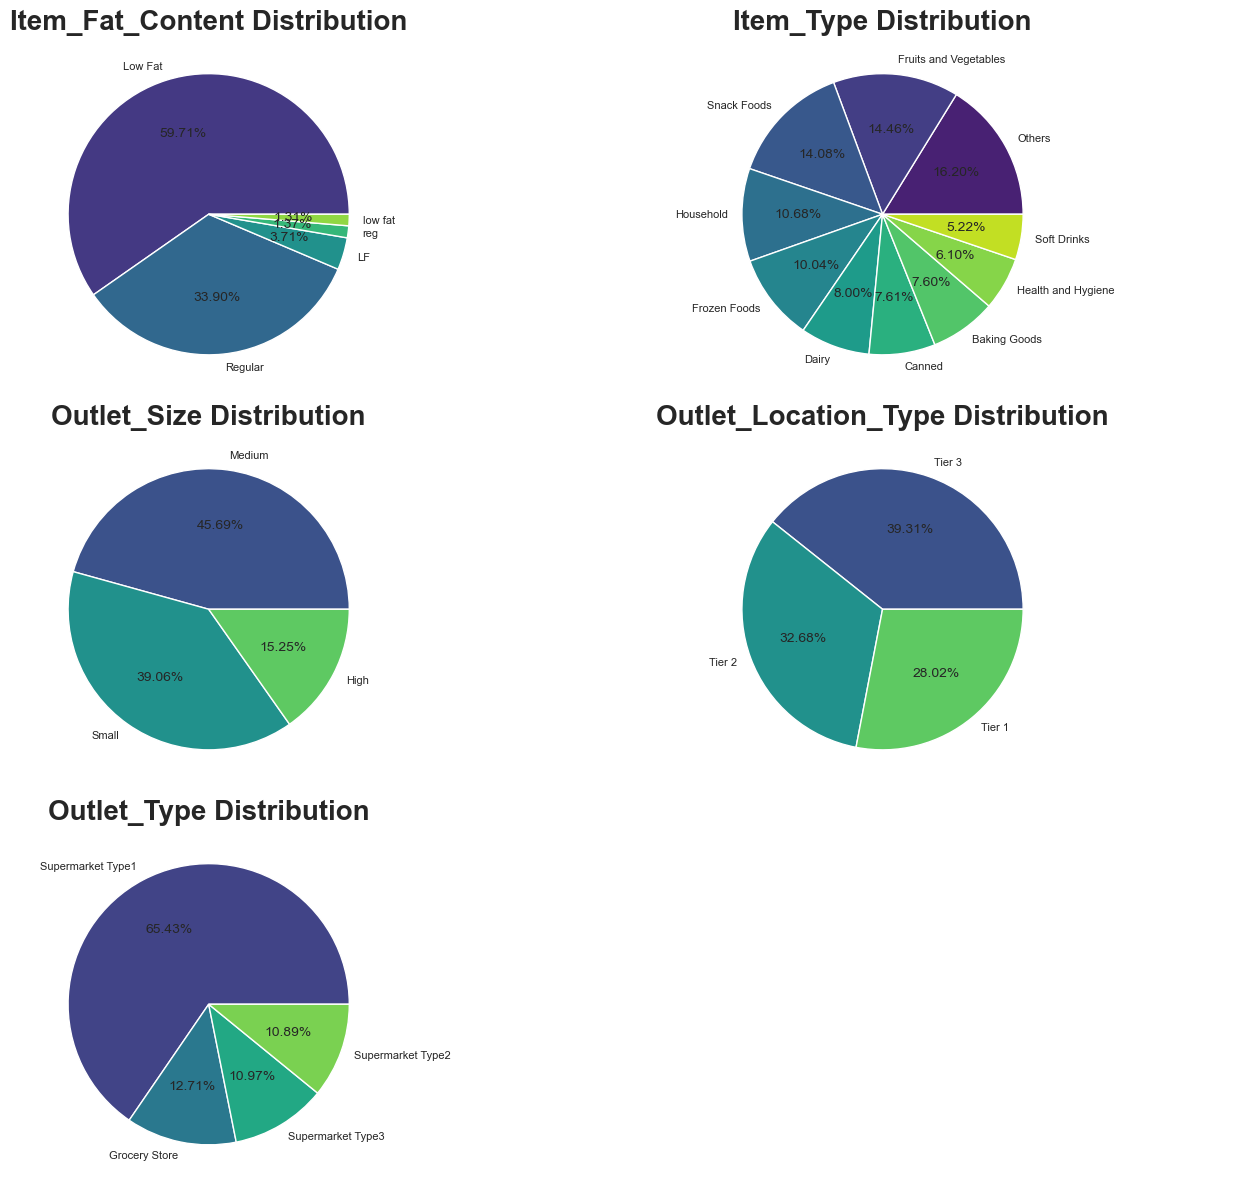

In [17]:
cat_columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
pie_plot(cat_columns,df_cp)

### Bivariate Analysis

#### Item MRP (Maximum Retail Price) vs. Sales

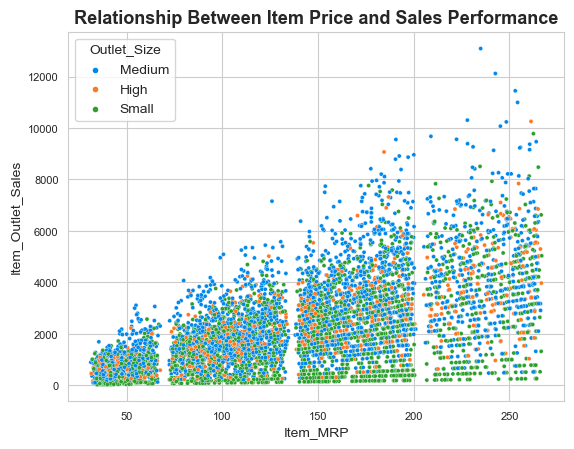

In [18]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size',data=Big_Mart_df)

plt.title('Relationship Between Item Price and Sales Performance',fontsize=13,fontweight='bold')
plt.show()

#### Outlet Type vs. Sales

In [19]:
type_sales = Big_Mart_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
type_sales

Outlet_Type  Item_Outlet_Sales
0  Supermarket Type3        3694.038558
1  Supermarket Type1        2316.181148
2  Supermarket Type2        1995.498739
3      Grocery Store         339.828500

Text(0.5, 1.0, 'Outlet Type vs. Sales')

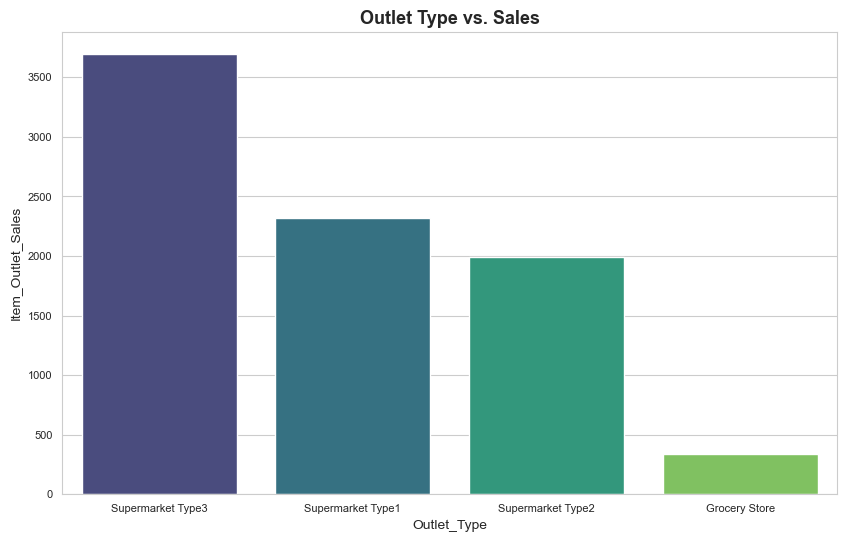

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=type_sales,palette='viridis')
plt.title('Outlet Type vs. Sales',fontsize=13,fontweight='bold')

#### Outlet Location vs. Sales

In [21]:
location_sales = Big_Mart_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Outlet_Location_Type')
location_sales

Outlet_Location_Type  Item_Outlet_Sales
0               Tier 1        1876.909159
1               Tier 2        2323.990559
2               Tier 3        2279.627651

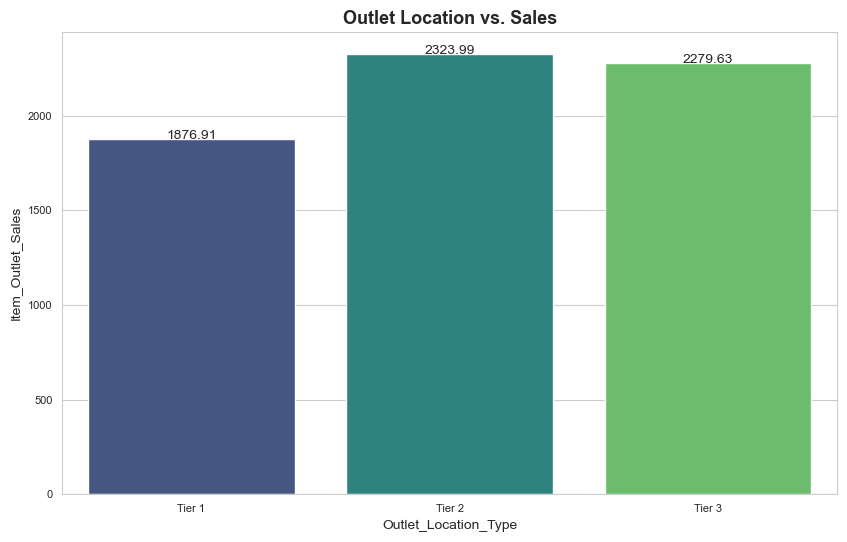

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=location_sales,palette='viridis')
plt.title('Outlet Location vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(location_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

#### Outlet Size vs. Sales

In [23]:
size_sales = Big_Mart_df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()
size_sales

Outlet_Size  Item_Outlet_Sales
0        High        2298.995256
1      Medium        2681.603542
2       Small        1912.149161

Text(0.5, 1.0, 'Outlet_Size')

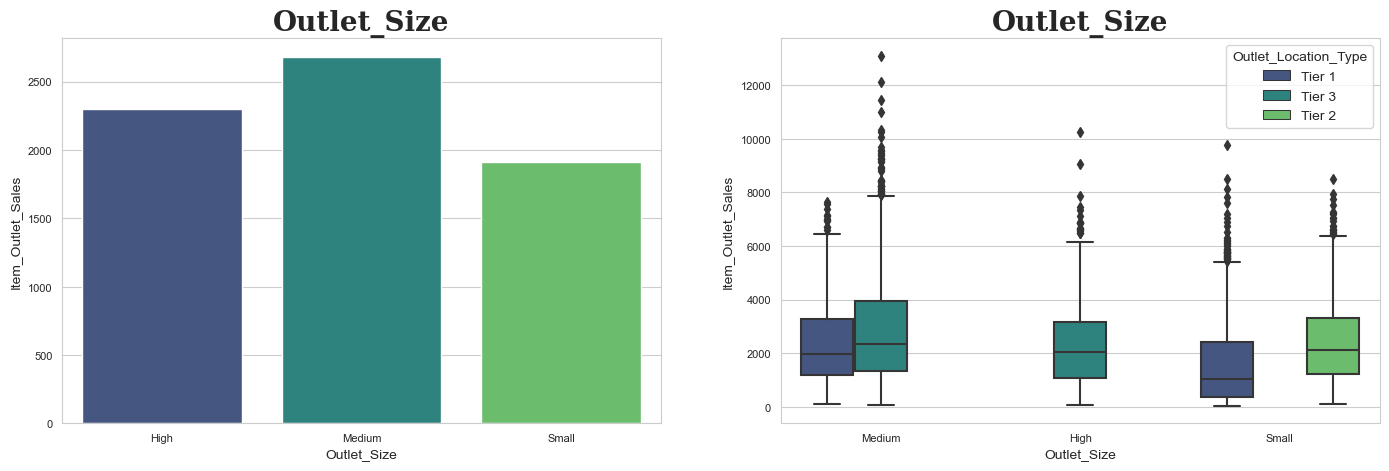

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (17, 5))

sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=size_sales,ax=ax[0],palette='viridis')
ax[0].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=Big_Mart_df,ax=ax[1],palette='viridis')
ax[1].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)

#### Item Fat Content vs. Sales

In [25]:
fat_sales = Big_Mart_df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().reset_index()
fat_sales

Item_Fat_Content  Item_Outlet_Sales
0               LF        2073.551928
1          Low Fat        2164.477336
2          Regular        2235.186702
3          low fat        2087.740737
4              reg        1962.192268

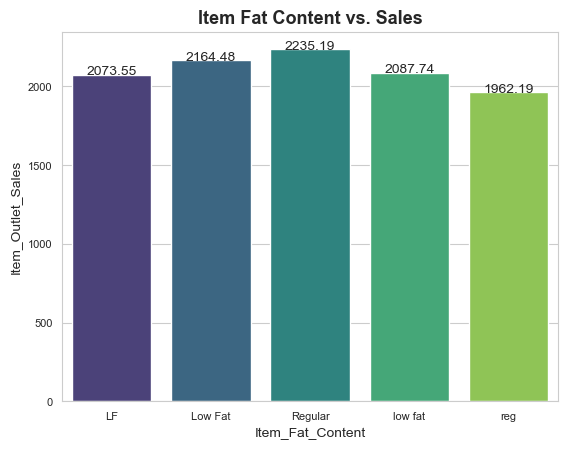

In [26]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=fat_sales,palette='viridis')
plt.title('Item Fat Content vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(fat_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

#### Item Type vs. Sales

In [27]:
item_type = Big_Mart_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
item_type

Item_Type  Item_Outlet_Sales
0           Starchy Foods        2374.332773
1                 Seafood        2326.065928
2   Fruits and Vegetables        2289.009592
3             Snack Foods        2277.321739
4               Household        2258.784300
5                   Dairy        2232.542597
6                  Canned        2225.194904
7                  Breads        2204.132226
8                    Meat        2158.977911
9             Hard Drinks        2139.221622
10           Frozen Foods        2132.867744
11              Breakfast        2111.808651
12     Health and Hygiene        2010.000265
13            Soft Drinks        2006.511735
14           Baking Goods        1952.971207
15                 Others        1926.139702

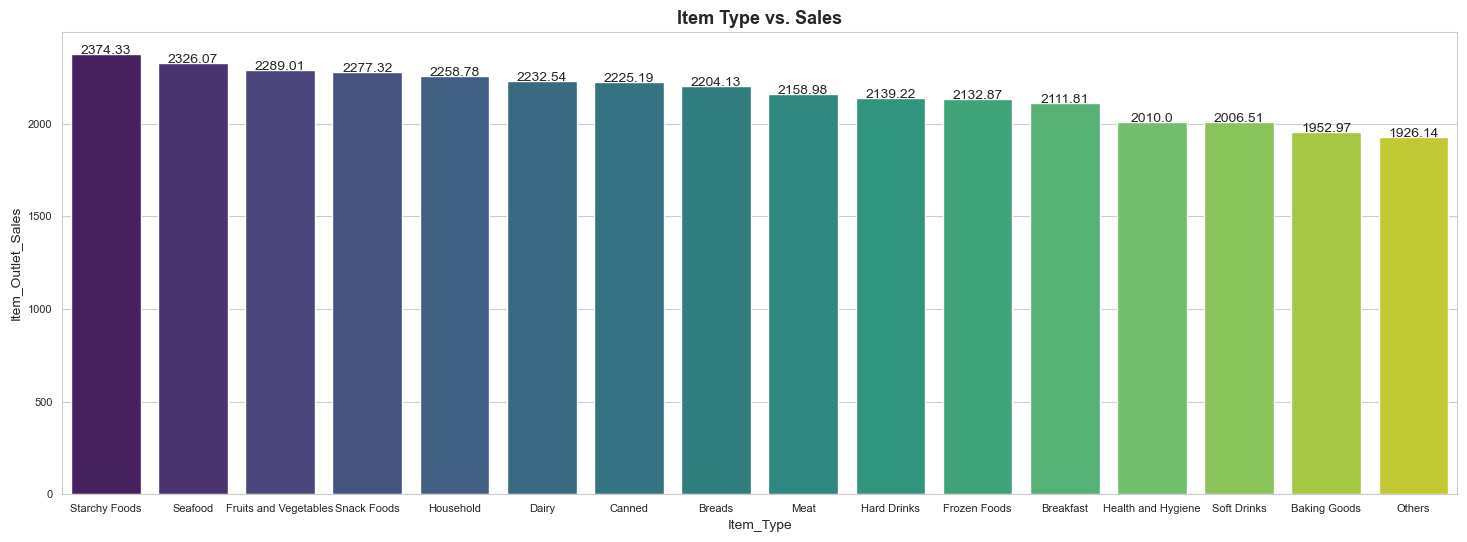

In [28]:
plt.figure(figsize=(18,6))

sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=item_type,palette='viridis')
plt.title('Item Type vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(item_type['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

plt.show()

#### Outlet Establishment Year vs. Sales

In [29]:
year_sales = Big_Mart_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
year_sales

Outlet_Establishment_Year  Item_Outlet_Sales
0                       1985        2483.677474
1                       2004        2438.841866
2                       1999        2348.354635
3                       2007        2340.675263
4                       1987        2298.995256
5                       1997        2277.844267
6                       2002        2192.384798
7                       2009        1995.498739
8                       1998         339.351662

Text(0.5, 1.0, 'Outlet Establishment Year vs. Sales')

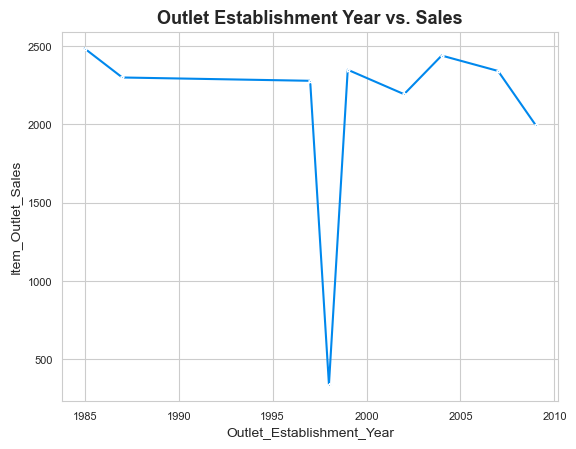

In [30]:
sns.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=year_sales,marker='*')
plt.title('Outlet Establishment Year vs. Sales',fontsize=13,fontweight='bold')

# DATA PREPROCESSING / FEATURE ENGINEERING :-

## 1. Check Missing Value :-


In [31]:
Big_Mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# Create function to check missing value with percentage
def missing_value(Data):
    null_value = Big_Mart_df.isnull().sum()
    percentage = (Big_Mart_df.isnull().sum()/Big_Mart_df.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing_Number','Missing_Percentage'])
    return null_value
missing_value(Big_Mart_df)

Missing_Number  Missing_Percentage
Item_Identifier                         0            0.000000
Item_Weight                          1463           17.165317
Item_Fat_Content                        0            0.000000
Item_Visibility                         0            0.000000
Item_Type                               0            0.000000
Item_MRP                                0            0.000000
Outlet_Identifier                       0            0.000000
Outlet_Establishment_Year               0            0.000000
Outlet_Size                          2410           28.276428
Outlet_Location_Type                    0            0.000000
Outlet_Type                             0            0.000000
Item_Outlet_Sales                       0            0.000000

**Missing Values:-**
* Item_Weight: Missing values in 1463 rows (~17% of data).
* Outlet_Size: Missing values in 2410 rows (~28% of data).

## 2. Impute Missing Value :-


1. Item_Weight :-

In [33]:
Big_Mart_df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [34]:
Big_Mart_df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [35]:
#For Item_Weight, use the mean or median of Item_Weight grouped by Item_Type for imputation:
Big_Mart_df['Item_Weight'] = Big_Mart_df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [36]:
Big_Mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

2. Outlet_Size :-

In [37]:
Big_Mart_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

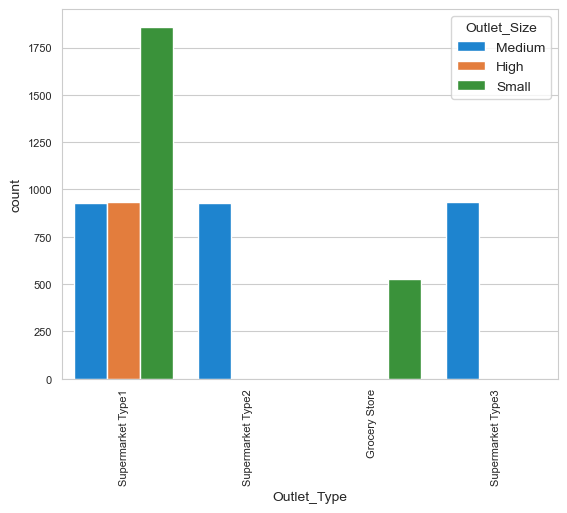

In [38]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = Big_Mart_df, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

In [39]:
# Calculate the mode for each 'Outlet_Type'
mode_of_outlet_size = Big_Mart_df.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
)

# Verify the pivot_table result
print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [40]:
# For Outlet_Size, impute missing values using the mode based on Outlet_Type:
Big_Mart_df['Outlet_Size'] = Big_Mart_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))


In [41]:
Big_Mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3. Outlier  Handling :-
* Outliers are extreme values that deviate significantly from the majority of the data. Features with a large range compared to their interquartile range (IQR) often have outliers.

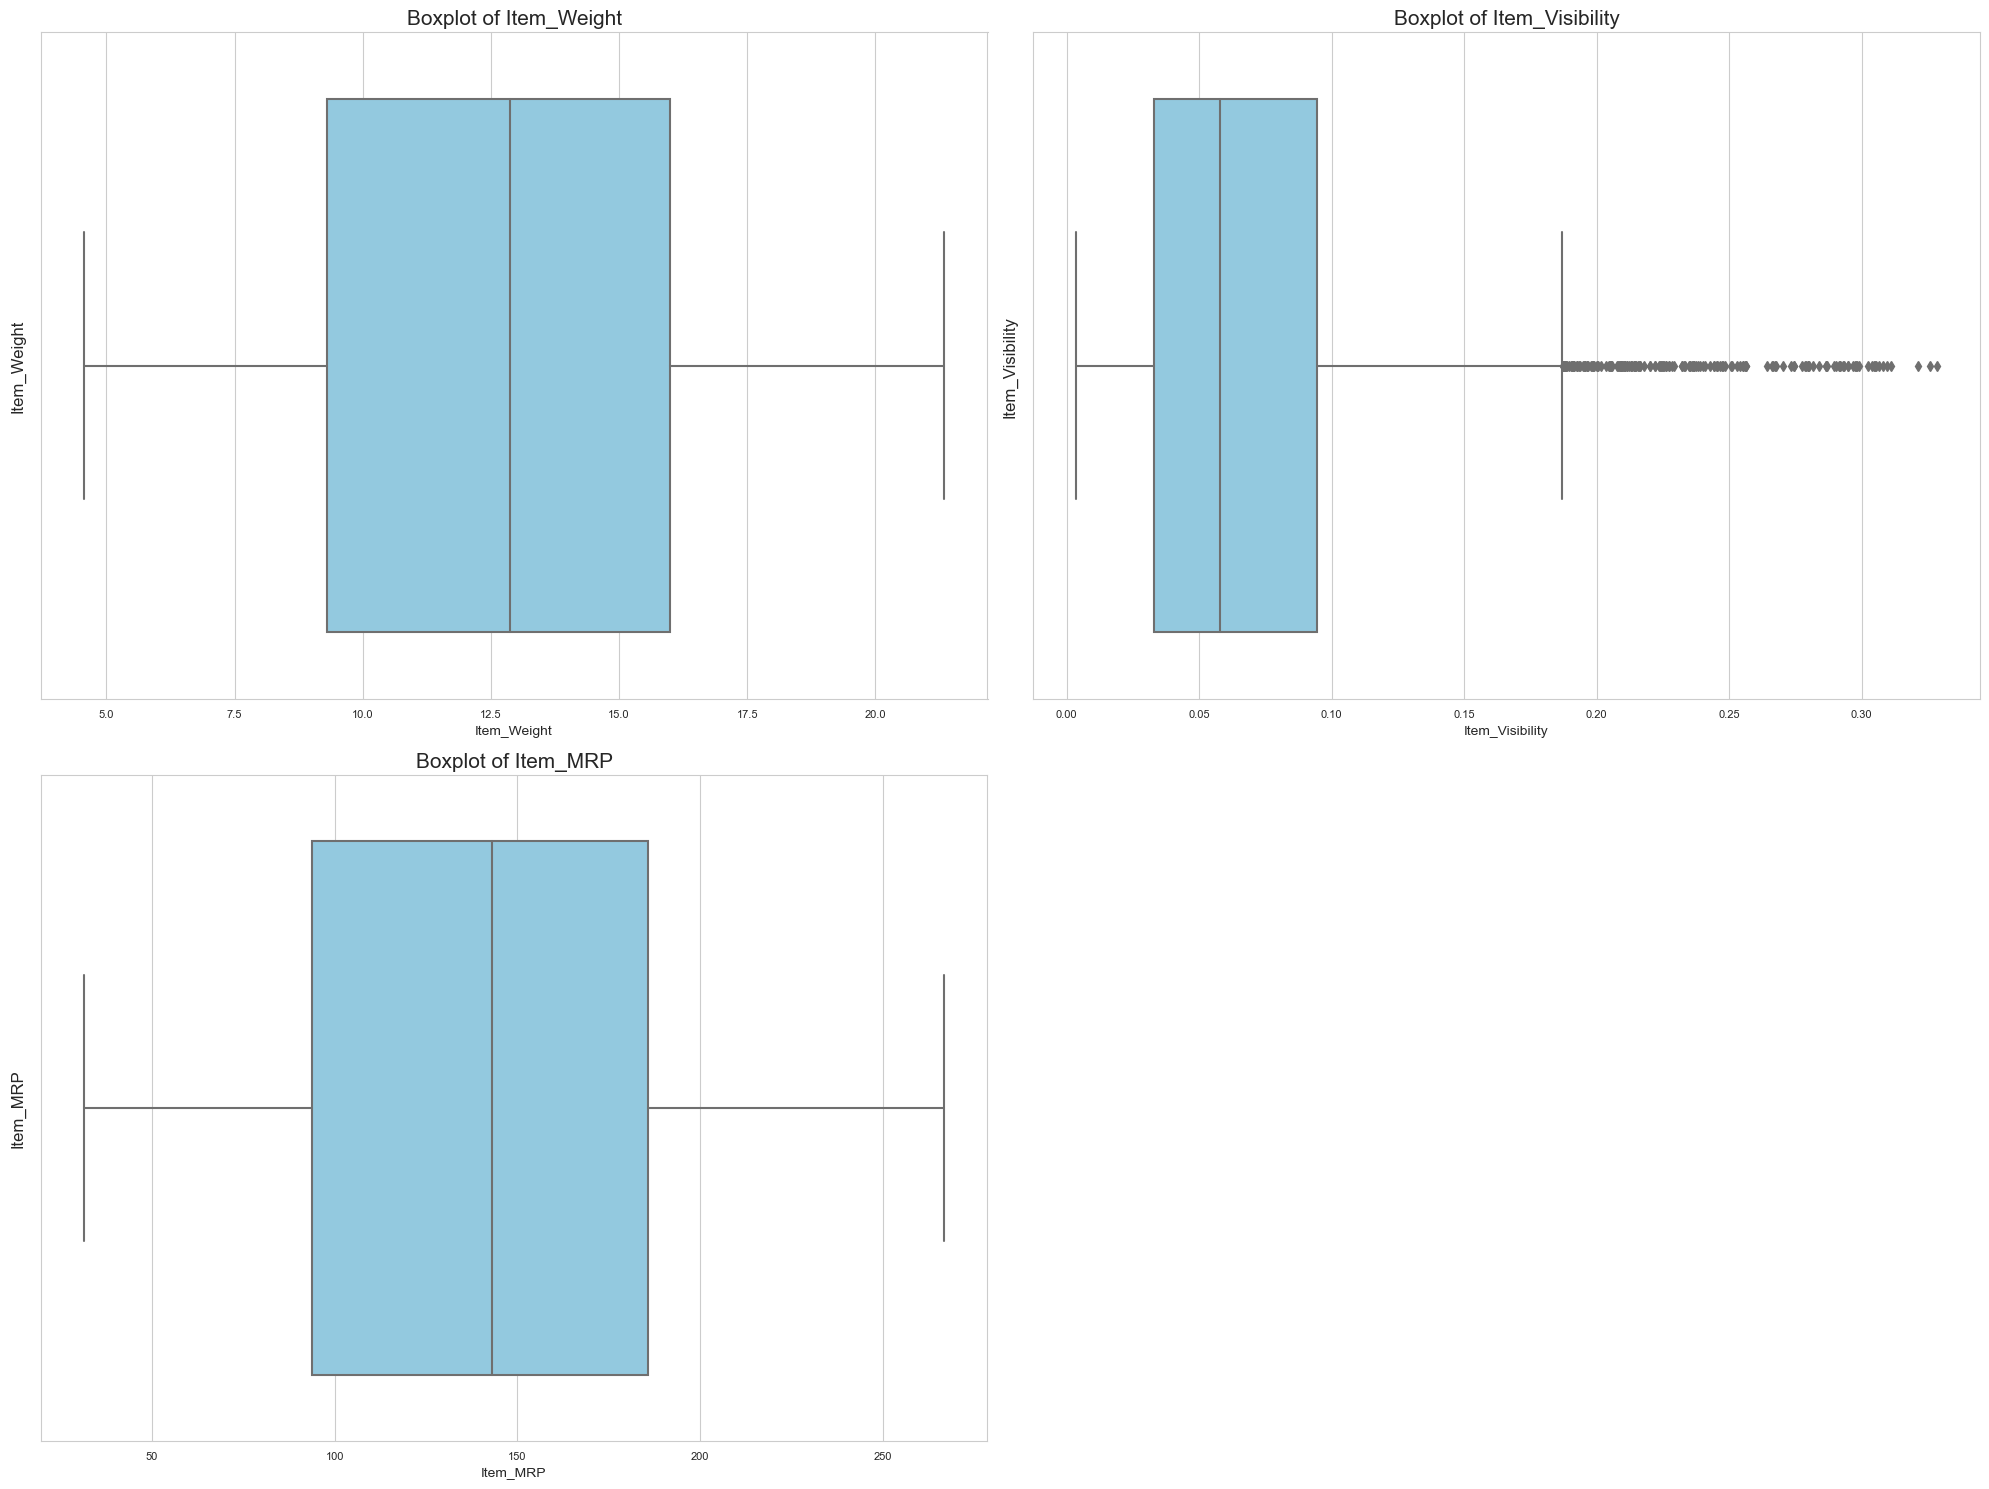

In [42]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Call the function
boxplot(Big_Mart_df, continuous)


**Features Likely to Have Outliers**
1. Item_Visibility:
    * Minimum value is 0 (implying missing or erroneous values).
    * Contains extreme values beyond 75th percentile (0.094).

In [43]:
from scipy import stats
IQR = stats.iqr(Big_Mart_df.Item_Visibility,interpolation = 'midpoint')
IQR

0.061499949

In [44]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = Big_Mart_df.Item_Visibility.quantile(0.25)
# Third quartile (Q3) 
Q3 =Big_Mart_df.Item_Visibility.quantile(0.75)
##getting the limits
min_limit= Q1 - 1.5*IQR
print('Minimum limit',min_limit)
max_limit= Q3 +1.5*IQR
print('Maximum limit',max_limit)

Minimum limit -0.059164579999999994
Maximum limit 0.186835216


In [45]:
len(Big_Mart_df.loc[Big_Mart_df['Item_Visibility'] > max_limit])/18278*100

0.9464930517562097

In [ ]:
# Filter or cap extreme outliers
Big_Mart_df['Item_Visibility'] = Big_Mart_df['Item_Visibility'].clip(lower=min_limit, upper=max_limit)

<Axes: xlabel='Item_Visibility'>

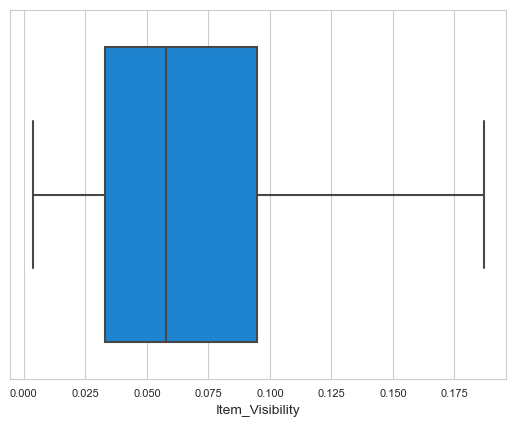

In [47]:
sns.boxplot(x = Big_Mart_df.Item_Visibility)

## 4. Handling Categorical Data :-


* dataset has categorical variables (Item_Fat_Content, Item_Type, Outlet_Size, etc.) that need to be converted into numerical formats for machine learning models.
* The Item_Fat_Content column contains various representations of the same categories which can lead to inconsistencies in data analysis like "Low Fat" vs. "low fat" and "Regular.

**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type

1. Item_Fat_Content :-

In [48]:
Big_Mart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
# Encode Categorical Variables
# Standardize categories in Item_Fat_Content
Big_Mart_df['Item_Fat_Content'] = Big_Mart_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [50]:
Big_Mart_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* manual encoding is best technique to handle categorical feature and Lots of Labels available with the help of map function.

In [51]:
Big_Mart_df.Item_Fat_Content = Big_Mart_df.Item_Fat_Content.map({'Regular':1,'Low Fat':0})

In [52]:
Big_Mart_df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

2. Item_Type :-

In [53]:
Big_Mart_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [54]:
Big_Mart_df.Item_Type = Big_Mart_df.Item_Type.map({'Fruits and Vegetables':15,'Snack Foods':14,'Household':13,'Frozen Foods':12,
                                            'Dairy':11,'Canned':10,'Baking Goods':9,'Health and Hygiene':8,'Soft Drinks':7,'Meat':6,'Breads':5,'Hard Drinks':4,
                                            'Others':3,'Starchy Foods':2,'Breakfast':1,'Seafood':0})



In [55]:
Big_Mart_df['Item_Type'].value_counts()

15    1232
14    1200
13     910
12     856
11     682
10     649
9      648
8      520
7      445
6      425
5      251
4      214
3      169
2      148
1      110
0       64
Name: Item_Type, dtype: int64

3. Outlet_Identifier:-

In [56]:
Big_Mart_df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [57]:
Big_Mart_df.Outlet_Identifier = Big_Mart_df.Outlet_Identifier.map({'OUT027':9,'OUT013':8,'OUT049':7,'OUT046':6,'OUT035':5,'OUT045':4,
                                            'OUT018':3,'OUT017':2,'OUT010':1,'OUT019':0})

In [58]:
Big_Mart_df["Outlet_Identifier"].value_counts()

9    935
8    932
7    930
6    930
5    930
4    929
3    928
2    926
1    555
0    528
Name: Outlet_Identifier, dtype: int64

4. Outlet_Size :-

In [59]:
Big_Mart_df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [60]:
Big_Mart_df.Outlet_Size = Big_Mart_df.Outlet_Size.map({'Small':2,'Medium':1,'High':0})

In [61]:
Big_Mart_df['Outlet_Size'].value_counts()

2    4798
1    2793
0     932
Name: Outlet_Size, dtype: int64

5. Outlet_Location_Type :-

In [62]:
Big_Mart_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [63]:
Big_Mart_df.Outlet_Location_Type = Big_Mart_df.Outlet_Location_Type.map({'Tier 3':2,'Tier 2':1,'Tier 1':0})

In [64]:
Big_Mart_df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

6. Outlet_Type :-

In [65]:
Big_Mart_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [66]:
Big_Mart_df.Outlet_Type = Big_Mart_df.Outlet_Type.map({'Supermarket Type1':3,'Grocery Store':2,'Supermarket Type3':1,'Supermarket Type2':0})

In [67]:
Big_Mart_df['Outlet_Type'].value_counts()

3    5577
2    1083
1     935
0     928
Name: Outlet_Type, dtype: int64

**Create a new feature for Outlet Age.**

In [68]:
Big_Mart_df['Outlet_Age'] = 2024 - Big_Mart_df['Outlet_Establishment_Year']  # Replace 2024 with the current year
#Drop the original Outlet_Establishment_Year
Big_Mart_df = Big_Mart_df.drop(columns=['Outlet_Establishment_Year'])

## 5. Feature Scaling :-

In [69]:
Big_Mart_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047         11   
1           DRC01         5.92                 1         0.019278          7   
2           FDN15        17.50                 0         0.016760          6   
3           FDX07        19.20                 1         0.057792         15   
4           NCD19         8.93                 0         0.057792         13   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  249.8092                  7            1                     0   
1   48.2692                  3            1                     2   
2  141.6180                  7            1                     0   
3  182.0950                  1            2                     2   
4   53.8614                  8            0                     2   

   Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0            3          3735.1380          25  
1            0           443.4228          15  
2            3          2097.2700          25  
3            2           732.3800          26  
4            3           994.7052          37

In [70]:
# min max scaling
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
Big_Mart_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]=scale.fit_transform(Big_Mart_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

In [71]:
Big_Mart_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15    -0.533193                 0        -0.678782         11   
1           DRC01    -1.038425                 1        -0.626246          7   
2           FDN15     0.692517                 0        -0.667192          6   
3           FDX07     0.946628                 1         0.000000         15   
4           NCD19    -0.588499                 0         0.000000         13   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  1.163142                  7            1                     0   
1 -1.031872                  3            1                     2   
2 -0.015191                  7            1                     0   
3  0.425652                  1            2                     2   
4 -0.970966                  8            0                     2   

   Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0            3          3735.1380    0.000000  
1            0           443.4228   -0.588235  
2            3          2097.2700    0.000000  
3            2           732.3800    0.058824  
4            3           994.7052    0.705882

## 6. Duplicates Value :-

In [72]:
Big_Mart_df.duplicated().sum()

0

##  Feature Transformation

In [73]:
Big_Mart_df['Item_Visibility'] = np.log1p(Big_Mart_df['Item_Visibility'])
Big_Mart_df['Item_Outlet_Sales'] = np.log1p(Big_Mart_df['Item_Outlet_Sales'])


## Feature Selection :-

### Correlation

<Axes: >

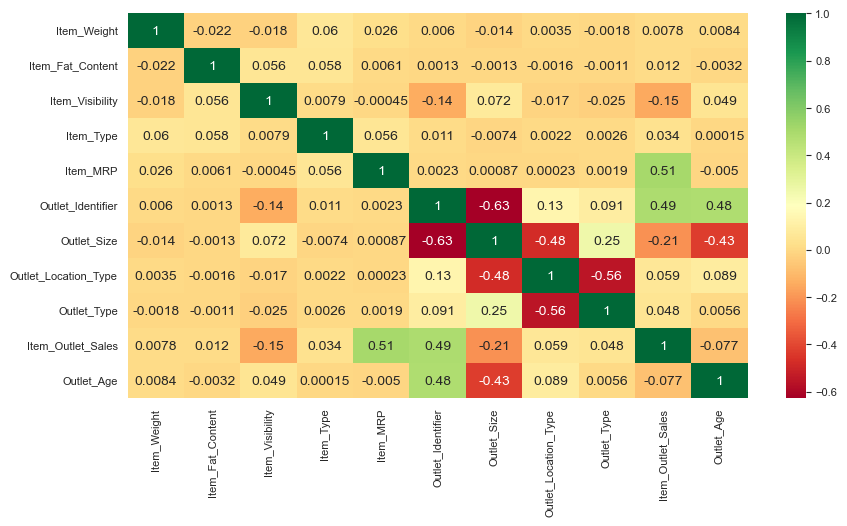

In [74]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(Big_Mart_df.corr(), cmap = "RdYlGn", annot = True)

In [75]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = Big_Mart_df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

### Split the Data
* Separate the dataset into features (X) and the target variable (y), then divide into training and testing sets.

In [76]:
from sklearn.model_selection import train_test_split

# Define features and target
X = Big_Mart_df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
y = Big_Mart_df['Item_Outlet_Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6818, 10)
Test set shape: (1705, 10)


## Linear Regression :-

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
print("Train R2:", r2_score(y_train, y_pred_train))
print("Test R2:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Train R2: 0.6283224687657597
Test R2: 0.6335043642261176
Test RMSE: 0.6207358714093101


## Random ForestRegressor :-

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.7144118671792594
Random Forest RMSE: 0.5479520021724666


## Hyperparameter Tuning :-

In [79]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", grid_search.best_params_)

# Best Model
best_rf_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_best = best_rf_model.predict(X_test)
print("Best Random Forest R2:", r2_score(y_test, y_pred_best))
print("Best Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest R2: 0.7349853956826538
Best Random Forest RMSE: 0.5278461319411861


## Use of Ensemble and Boosting Algorithms

In [81]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Generic function to fit model and return metrics for every algorithm
def boost_models(x):
    # Transforming target variable through QuantileTransformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname = x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat), 3), round(mean_absolute_error(y_test, yhat), 2), round(np.sqrt(mean_squared_error(y_test, yhat)), 2)

# List of algorithms
algo = [GradientBoostingRegressor(), lgb.LGBMRegressor(), xgb.XGBRFRegressor()]
score = []

# Evaluate each algorithm
for a in algo:
    score.append(boost_models(a))

# Collate all scores in a table
results_df = pd.DataFrame(score, columns=['Model', 'R² Score', 'MAE', 'RMSE'])

# Display the results
print(results_df)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score -0.000142
                       Model  R² Score  MAE  RMSE
0  GradientBoostingRegressor     0.739  0.4  0.52
1              LGBMRegressor     0.735  0.4  0.53
2             XGBRFRegressor     0.738  0.4  0.52


## Hyperparameter Tuning :-

In [81]:
from sklearn.model_selection import RandomizedSearchCV

# Example: RandomizedSearchCV for RandomForestRegressor
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'reg_lambda' :[0.26, 0.25, 0.2]
}

rf = xgb.XGBRFRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


regr_trans = TransformedTargetRegressor(regressor=random_search, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params) 


#using best params to create and fit model
best_model = xgb.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[15:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

{'reg_lambda': 0.25, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


(0.7396186949975613, 0.3989967548108103, 0.5232115701472877)

In [82]:
import pickle

with open("best_model.pkl", "wb") as file:
    pickle.dump(regr_trans, file)

print("Model saved as best_model.pkl")


Model saved as best_model.pkl


## Steps to Predict on Test CSV :-

In [83]:
import pandas as pd
Test_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\test.csv")

In [84]:
Test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [85]:
Test_df.shape

(5681, 11)

In [86]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### STATISTICAL MEASURES OF TEST DATA:-


In [87]:
Test_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

**Fix Item_Visibility Zeros**
* Replace zeros with the median of Item_Visibility for similar products.

In [88]:
Test_df['Item_Visibility'] = Test_df['Item_Visibility'].replace(0, np.nan)
Test_df['Item_Visibility'] = Test_df['Item_Visibility'].fillna(Test_df['Item_Visibility'].median())


In [89]:
#Extracting information about a Catgorical data
Test_df.describe(include="O")

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier  \
count             5681             5681         5681              5681   
unique            1543                5           16                10   
top              DRF48          Low Fat  Snack Foods            OUT027   
freq                 8             3396          789               624   

       Outlet_Size Outlet_Location_Type        Outlet_Type  
count         4075                 5681               5681  
unique           3                    3                  4  
top         Medium               Tier 3  Supermarket Type1  
freq          1862                 2233               3717


## DATA PREPROCESSING / FEATURE ENGINEERING :-

## 1. Check Missing Value :-


In [90]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [91]:
# Create function to check missing value with percentage
def missing_value(Data):
    null_value = Test_df.isnull().sum()
    percentage = (Test_df.isnull().sum()/Test_df.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing_Number','Missing_Percentage'])
    return null_value
missing_value(Test_df)

Missing_Number  Missing_Percentage
Item_Identifier                         0            0.000000
Item_Weight                           976           17.180074
Item_Fat_Content                        0            0.000000
Item_Visibility                         0            0.000000
Item_Type                               0            0.000000
Item_MRP                                0            0.000000
Outlet_Identifier                       0            0.000000
Outlet_Establishment_Year               0            0.000000
Outlet_Size                          1606           28.269671
Outlet_Location_Type                    0            0.000000
Outlet_Type                             0            0.000000

**Missing Values:-**
* Item_Weight: Missing values in 976 rows (~17% of data).
* Outlet_Size: Missing values in 1606 rows (~28% of data).

## 2. Impute Missing Value :-
1. Item_Weight :-


In [92]:
#For Item_Weight, use the mean or median of Item_Weight grouped by Item_Type for imputation:
Test_df['Item_Weight'] = Test_df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))


2. Outlet_Size :-

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

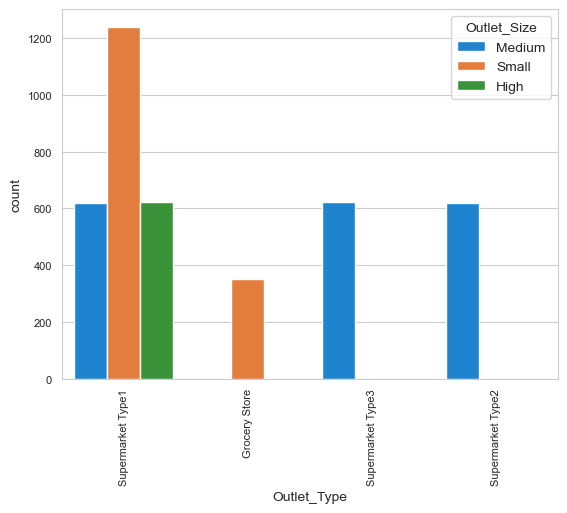

In [93]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = Test_df, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

In [94]:
# For Outlet_Size, impute missing values using the mode based on Outlet_Type:
Test_df['Outlet_Size'] = Test_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [95]:
Test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## 3. Outlier  Handling :-
* Outliers are extreme values that deviate significantly from the majority of the data. Features with a large range compared to their interquartile range (IQR) often have outliers.


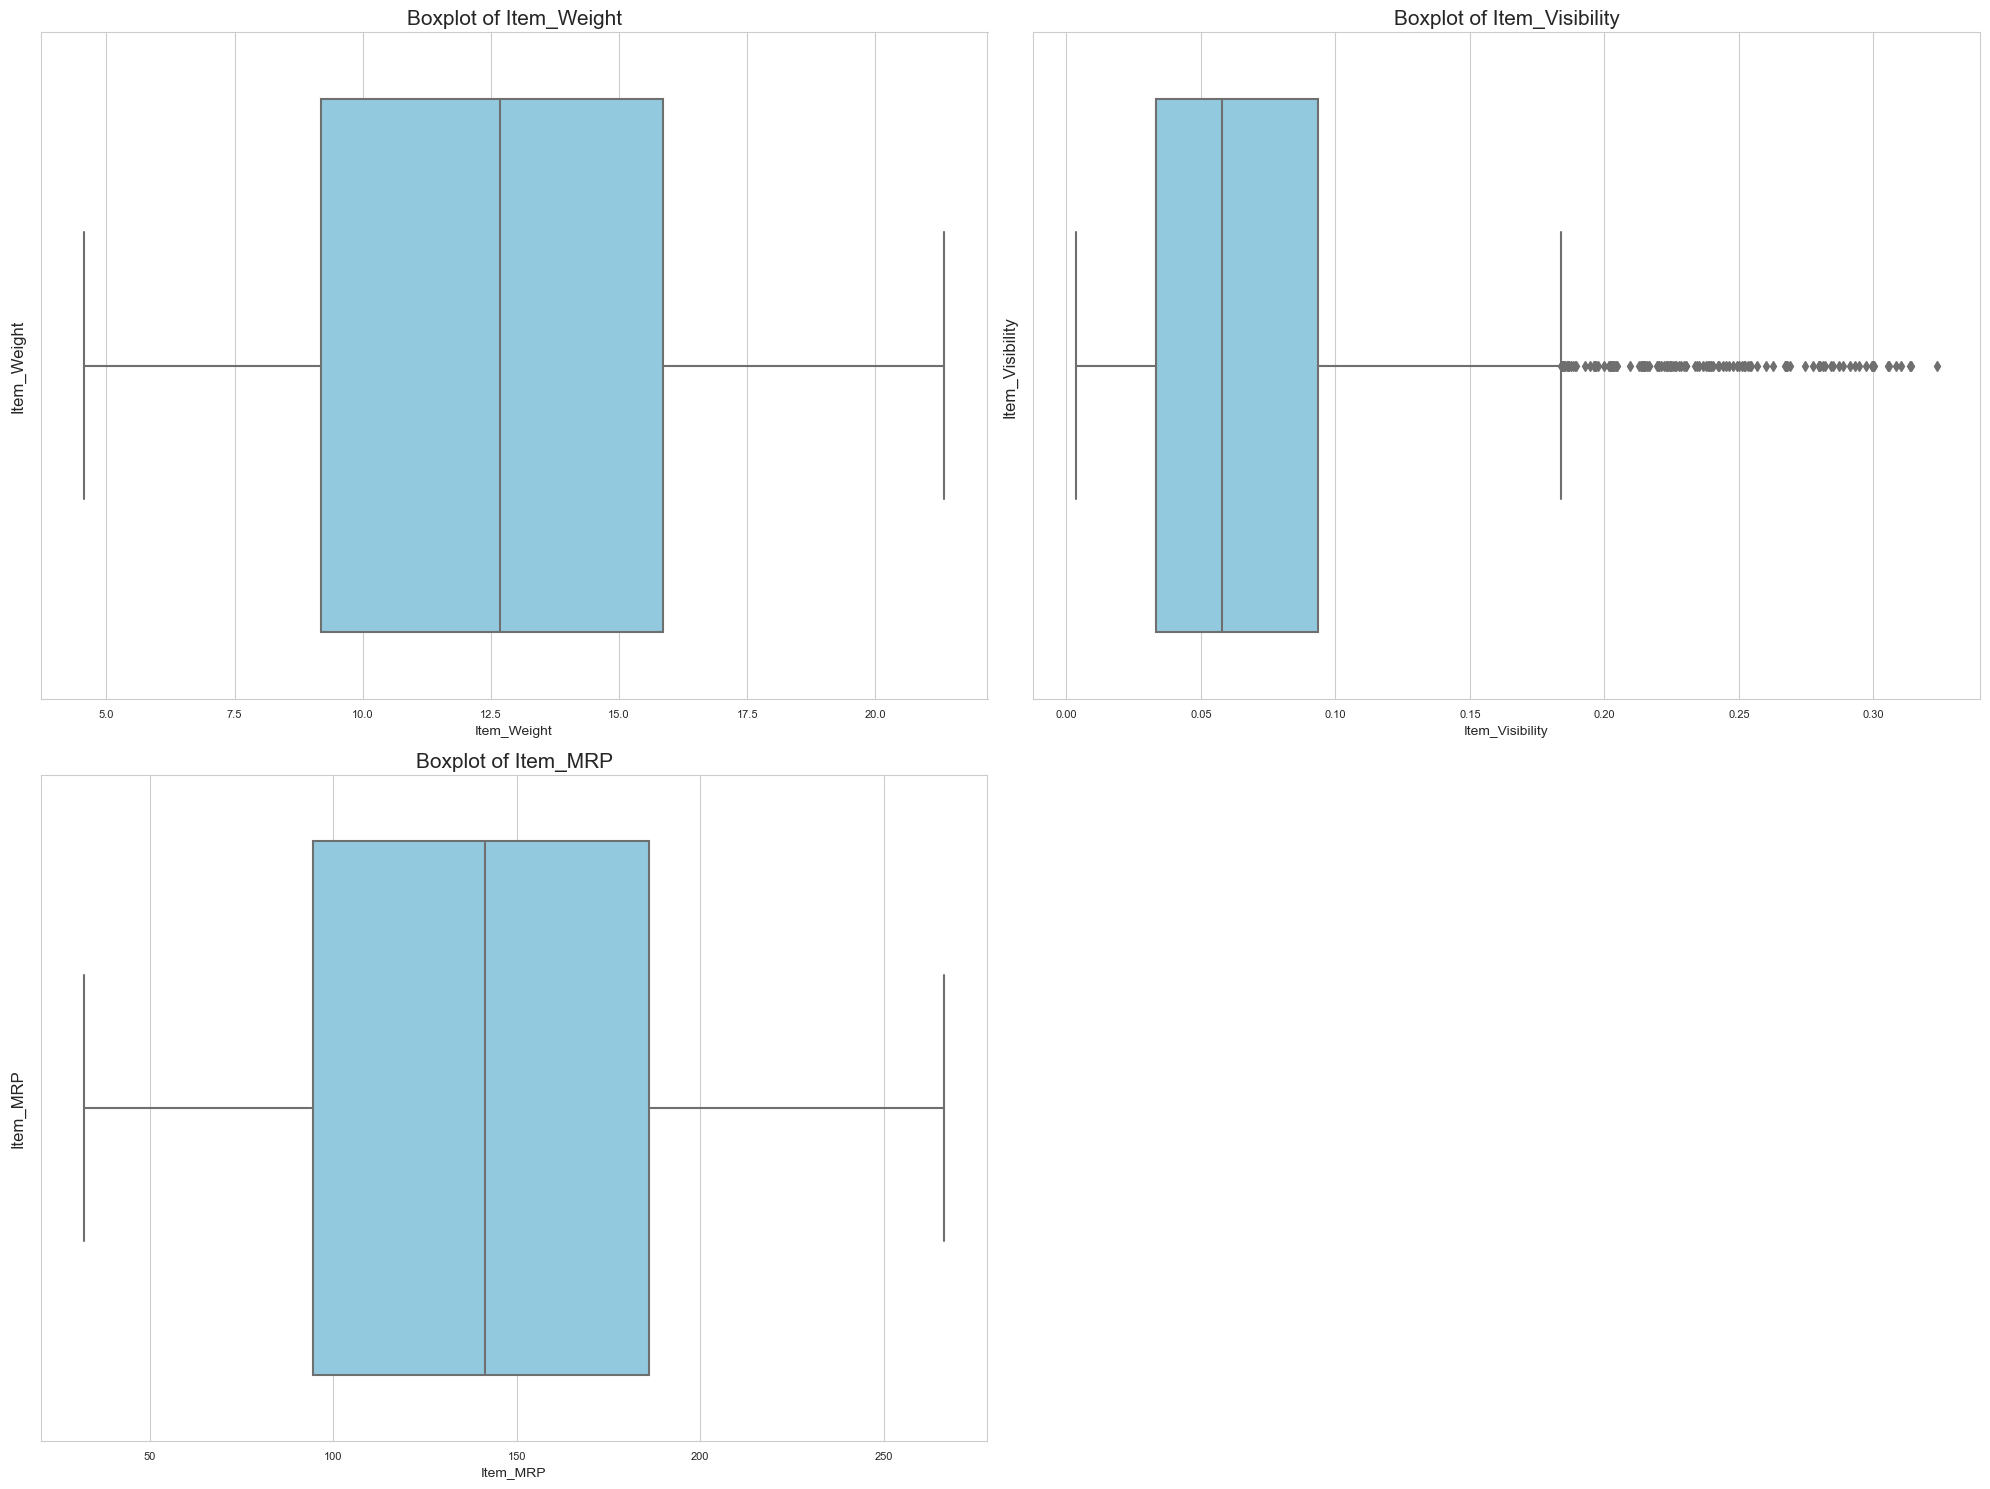

In [96]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Call the function
boxplot(Test_df, continuous)

**Features Likely to Have Outliers**
1. Item_Visibility:
    * Minimum value is 0 (implying missing or erroneous values).
    * Contains extreme values beyond 75th percentile (0.094).4

In [97]:
from scipy import stats
IQR = stats.iqr(Test_df.Item_Visibility,interpolation = 'midpoint')
IQR

## min and max limit calculation
# First quartile (Q1) 
Q1 = Test_df.Item_Visibility.quantile(0.25)
# Third quartile (Q3) 
Q3 =Test_df.Item_Visibility.quantile(0.75)
##getting the limits
min_limit= Q1 - 1.5*IQR
print('Minimum limit',min_limit)
max_limit= Q3 +1.5*IQR
print('Maximum limit',max_limit)


Minimum limit -0.05717465949999999
Maximum limit 0.18384499249999997


In [98]:
len(Test_df.loc[Test_df['Item_Visibility'] > max_limit])/18278*100


0.7331217857533646

In [99]:
# Filter or cap extreme outliers
Test_df['Item_Visibility'] = Test_df['Item_Visibility'].clip(lower=min_limit, upper=max_limit)


<Axes: xlabel='Item_Visibility'>

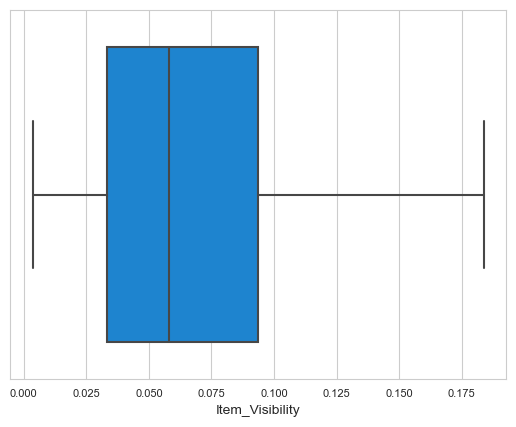

In [100]:
sns.boxplot(x = Test_df.Item_Visibility)

## 4. Handling Categorical Data :-
* dataset has categorical variables (Item_Fat_Content, Item_Type, Outlet_Size, etc.) that need to be converted into numerical formats for machine learning models.
* The Item_Fat_Content column contains various representations of the same categories which can lead to inconsistencies in data analysis like "Low Fat" vs. "low fat" and "Regular.









**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type



1. Item_Fat_Content


In [101]:
# Encode Categorical Variables
# Standardize categories in Item_Fat_Content
Test_df['Item_Fat_Content'] = Test_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [102]:
Test_df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [103]:
Test_df.Item_Fat_Content = Test_df.Item_Fat_Content.map({'Low Fat':1,'Regular':0})
Test_df['Item_Fat_Content'].value_counts()

1    3668
0    2013
Name: Item_Fat_Content, dtype: int64


2. Item_Type


In [104]:
Test_df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [105]:
Test_df.Item_Type = Test_df.Item_Type.map({'Fruits and Vegetables':15,'Snack Foods':14,'Household':13,'Frozen Foods':12,
                                            'Dairy':11,'Canned':10,'Baking Goods':9,'Health and Hygiene':8,'Soft Drinks':7,'Meat':6,'Breads':5,'Hard Drinks':4,
                                            'Others':3,'Starchy Foods':2,'Breakfast':1,'Seafood':0})
Test_df['Item_Type'].value_counts()

14    789
15    781
13    638
12    570
11    454
9     438
10    435
8     338
6     311
7     281
5     165
4     148
2     121
3     111
1      76
0      25
Name: Item_Type, dtype: int64

3. Outlet_Identifier


In [106]:
Test_df['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [107]:
Test_df.Outlet_Identifier = Test_df.Outlet_Identifier.map({'OUT027':9,'OUT013':8,'OUT049':7,'OUT046':6,'OUT035':5,'OUT045':4,
                                            'OUT018':3,'OUT017':2,'OUT010':1,'OUT019':0})
Test_df['Outlet_Identifier'].value_counts()

9    624
8    621
7    620
6    620
5    620
4    619
3    618
2    617
1    370
0    352
Name: Outlet_Identifier, dtype: int64

4. Outlet_Size


In [108]:
Test_df['Outlet_Size'].value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [109]:
Test_df.Outlet_Size = Test_df.Outlet_Size.map({'Small':2,'Medium':1,'High':0})

Test_df['Outlet_Size'].value_counts()

2    3198
1    1862
0     621
Name: Outlet_Size, dtype: int64

5. Outlet_Location_Type


In [110]:
Test_df['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [111]:
Test_df.Outlet_Location_Type = Test_df.Outlet_Location_Type.map({'Tier 3':2,'Tier 2':1,'Tier 1':0})

Test_df['Outlet_Location_Type'].value_counts()

2    2233
1    1856
0    1592
Name: Outlet_Location_Type, dtype: int64

6. Outlet_Type

In [112]:
Test_df['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [113]:
Test_df.Outlet_Type = Test_df.Outlet_Type.map({'Supermarket Type1':3,'Grocery Store':2,'Supermarket Type3':1,'Supermarket Type2':0})

Test_df['Outlet_Type'].value_counts()

3    3717
2     722
1     624
0     618
Name: Outlet_Type, dtype: int64

**Create a new feature for Outlet Age.**

In [114]:
Test_df['Outlet_Age'] = 2024 - Test_df['Outlet_Establishment_Year']  # Replace 2024 with the current year
#Drop the original Outlet_Establishment_Year
Test_df = Test_df.drop(columns=['Outlet_Establishment_Year'])

## 5. Feature Scaling :-

In [115]:
# min max scaling
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
Test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]=scale.fit_transform(Test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])


In [116]:
Test_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDW58     1.211983                 1        -0.836312         14   
1           FDW14    -0.658791                 0        -0.324107         11   
2           NCN55     0.287865                 1         0.690702          3   
3           FDQ58    -0.806800                 1        -0.706471         14   
4           FDY38     0.040689                 0         1.006434         11   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0 -0.366243                  7            1                     0   
1 -0.590469                  2            2                     1   
2  1.095223                  1            2                     2   
3  0.148651                  2            2                     1   
4  1.013098                  9            1                     2   

   Outlet_Type  Outlet_Age  
0            3    0.000000  
1            3   -0.470588  
2            2    0.058824  
3            3   -0.470588  
4            1    0.823529

## 6. Duplicates Value :-


In [117]:
Test_df.duplicated().sum()

0

##  Feature Transformation


In [118]:
Test_df['Item_Visibility'] = np.log1p(Test_df['Item_Visibility'])

## Feature Selection :-
### Correlation

<Axes: >

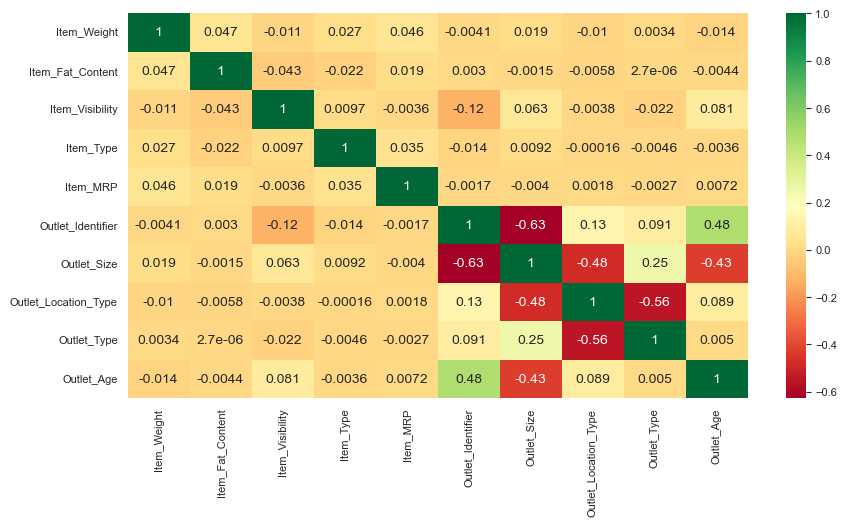

In [119]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(Test_df.corr(), cmap = "RdYlGn", annot = True)

In [120]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = Test_df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

In [121]:
# Retain Item_Identifier
item_ids = Test_df['Item_Identifier']

In [122]:
Test_df = Test_df[X_train.columns]

## Use the Model to Predict

In [123]:
import joblib

# Load the trained model
model = joblib.load(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\best_model.pkl")  # Adjust the path if necessary

# Make predictions
predictions = model.predict(Test_df)

# Convert predictions back to the original scale if transformations were applied
final_predictions = np.expm1(predictions)  # Use this if log transformation was used


## Save Predictions

In [124]:
Test_df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0     1.211983                 1        -1.809793         14 -0.366243   
1    -0.658791                 0        -0.391721         11 -0.590469   
2     0.287865                 1         0.525144          3  1.095223   
3    -0.806800                 1        -1.225779         14  0.148651   
4     0.040689                 0         0.696359         11  1.013098   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                  7            1                     0            3   
1                  2            2                     1            3   
2                  1            2                     2            2   
3                  2            2                     1            3   
4                  9            1                     2            1   

   Outlet_Age  
0    0.000000  
1   -0.470588  
2    0.058824  
3   -0.470588  
4    0.823529

In [125]:
# Make predictions
predictions = model.predict(Test_df)

# Save predictions to a CSV file
output = pd.DataFrame({'Item_Identifier':item_ids, 'Item_Outlet_Sales': predictions})
output.to_csv('submission_1.csv', index=False)


In [130]:
print(output['Item_Outlet_Sales'].describe())


count    5681.000000
mean        7.367030
std         0.877274
min         3.833973
25%         6.873087
50%         7.592648
75%         8.003011
max         8.788805
Name: Item_Outlet_Sales, dtype: float64


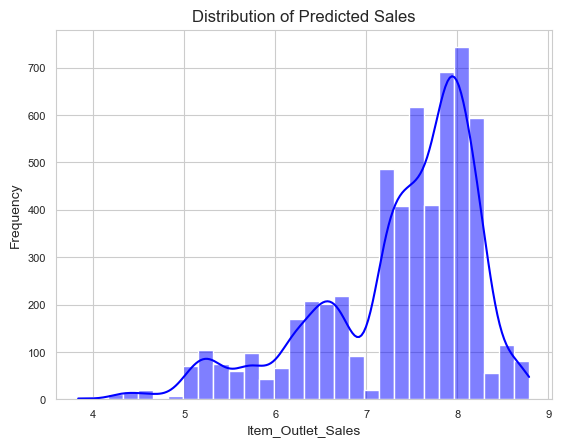

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(output['Item_Outlet_Sales'], kde=True, bins=30, color='blue')
plt.title("Distribution of Predicted Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()


In [126]:
Submission_df = pd.read_csv("submission_1.csv")

In [127]:
Submission_df.head()

Item_Identifier  Item_Outlet_Sales
0           FDW58           7.375255
1           FDW14           7.195219
2           NCN55           6.206026
3           FDQ58           7.821464
4           FDY38           8.715120

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example if true_sales is available
#true_sales = pd.read_csv("ground_truth.csv")  # Replace with the actual ground truth file
mae = mean_absolute_error(Submission_df['Item_Outlet_Sales'], output['Item_Outlet_Sales'])
rmse = np.sqrt(mean_squared_error(Submission_df['Item_Outlet_Sales'], output['Item_Outlet_Sales']))
r2 = r2_score(Submission_df['Item_Outlet_Sales'], output['Item_Outlet_Sales'])

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 1.107912707905592e-07
RMSE: 1.6043534821127274e-07
R² Score: 0.9999999999999666
